# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Topaz Montague [P6: Web Scraping, NLP (Requests, BeautifulSoup, and spaCy) Project Repository](https://github.com/tfmontague/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

##### Question 1 Response

In [9]:
import requests
from bs4 import BeautifulSoup
import pickle

# Fetch the article HTML
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for non-200 status codes

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Extract the article content
article_content = soup.find("article").decode_contents()  # Safely extract HTML content

# Save the data as a .pkl file
file_path = "C:\\Users\\topaz\\Documents\\webmining-npl\\web-scraping\\data\\article_content.pkl"
with open(file_path, "wb") as file:
   pickle.dump(article_content, file)

print("Article content extracted and saved to .pkl file.")


Article content extracted and saved to .pkl file.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

##### Question 2 Response

In [10]:
import pickle
from bs4 import BeautifulSoup

# The path to the .pkl file
file_path = r'C:\Users\topaz\Documents\webmining-npl\web-scraping\data\article_content.pkl'

# Open and read the .pkl file
with open(file_path, 'rb') as file:
    article_html = pickle.load(file)

# Parse the HTML content
soup = BeautifulSoup(article_html, 'html.parser')

# Extract text using .get_text()
article_text = soup.get_text()

print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

##### Question 3 Response

In [11]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# The path to the .pkl file
file_path = r'C:\Users\topaz\Documents\webmining-npl\web-scraping\data\article_content.pkl'

# Load and parse the article's HTML content
with open(file_path, 'rb') as file:
    article_html = pickle.load(file)
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens (ignore punctuation, stopwords, and whitespace)
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each token
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

print("Most Common Tokens and Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


Most Common Tokens and Frequencies:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: headlight, Frequency: 11
Token: technology, Frequency: 10
Token: led, Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

##### Question 4 Response

In [12]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# The path to the .pkl file
file_path = r'C:\Users\topaz\Documents\webmining-npl\web-scraping\data\article_content.pkl'

# Load and parse the article's HTML content
with open(file_path, 'rb') as file:
    article_html = pickle.load(file)
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens and lemmatize (ignore punctuation, stopwords, and whitespace)
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

print("Most Common Lemmas and Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Most Common Lemmas and Frequencies:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: light, Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

##### Question 5 Response

In [13]:
import pickle
from bs4 import BeautifulSoup
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define the scoring functions
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    score = sum(token in interesting_tokens for token in tokens) / len(tokens) if tokens else 0
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    score = sum(lemma in interesting_lemmas for lemma in lemmas) / len(lemmas) if lemmas else 0
    return score

# The path to the .pkl file
file_path = r'C:\Users\topaz\Documents\webmining-npl\web-scraping\data\article_content.pkl'

# Load and parse the article's HTML content
with open(file_path, 'rb') as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the entire article text with spaCy
doc = nlp(article_text)

# Extract the first sentence
first_sentence = next(doc.sents).text

# Lists of most common tokens and lemmas (replace these with your actual data)
most_common_tokens = ['laser', 'headlights', 'headlight', 'technology', 'led']
most_common_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

# Score the first sentence
token_score = score_sentence_by_token(first_sentence, most_common_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, most_common_lemmas)

print("First Sentence:", first_sentence)
print(f"Sentence Token Score: {token_score}")
print(f"Sentence Lemma Score: {lemma_score}")


First Sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021









Sentence Token Score: 0.2
Sentence Lemma Score: 0.1


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

##### Question 6 Response

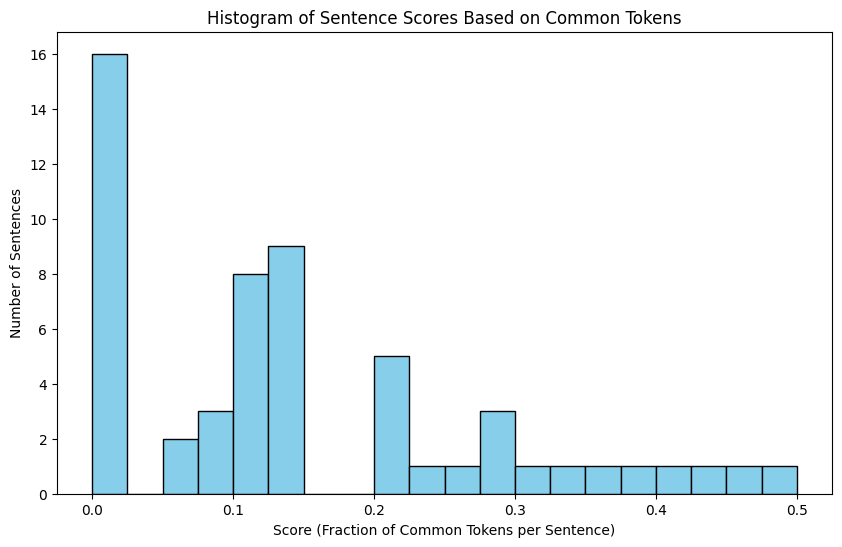

In [14]:
import pickle
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define the token scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    score = sum(token in interesting_tokens for token in tokens) / len(tokens) if tokens else 0
    return score

# The path to your .pkl file
file_path = r'C:\Users\topaz\Documents\webmining-npl\web-scraping\data\article_content.pkl'

# Load and parse the article's HTML content
with open(file_path, 'rb') as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Lists of most common tokens (use your actual data)
most_common_tokens = ['laser', 'headlights', 'headlight', 'technology', 'led']

# Score each sentence using tokens
sentence_scores = [score_sentence_by_token(sentence.text, most_common_tokens) for sentence in doc.sents]

# Plotting the histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentence Scores Based on Common Tokens')
plt.xlabel('Score (Fraction of Common Tokens per Sentence)')
plt.ylabel('Number of Sentences')
plt.show()

# The histogram shows that the most common range of scores for sentences based on common tokens is between 0.0 and 0.1. 
# This indicates that the majority of sentences contain a relatively low proportion of the common tokens identified in the analysis

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

##### Question 7 Response

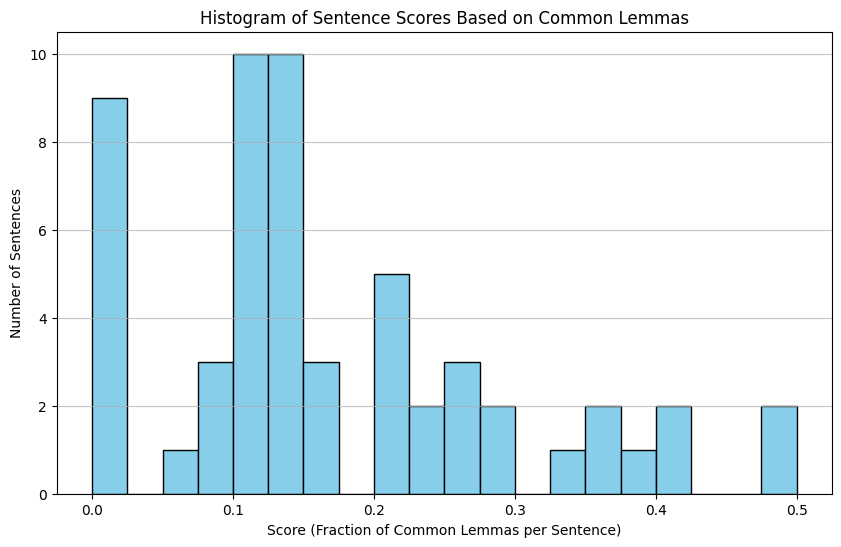

In [15]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Define the lemma scoring function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    score = sum(lemma in interesting_lemmas for lemma in lemmas) / len(lemmas) if lemmas else 0
    return score

# The path to your .pkl file
file_path = r'C:\Users\topaz\Documents\webmining-npl\web-scraping\data\article_content.pkl'

# Load and parse the article's HTML content
with open(file_path, 'rb') as file:
    article_html = pickle.load(file)

# Use BeautifulSoup to extract the text content from the HTML
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Lists of most common lemmas identified previously
most_common_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

# Score each sentence using lemmas
sentence_lemma_scores = [score_sentence_by_lemma(sentence.text, most_common_lemmas) for sentence in doc.sents]

# Plot the histogram of lemma scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentence Scores Based on Common Lemmas')
plt.xlabel('Score (Fraction of Common Lemmas per Sentence)')
plt.ylabel('Number of Sentences')
plt.grid(axis='y', alpha=0.75)
plt.show()

# The histogram provided indicates that the most common range of scores for sentences based on common lemmas is between 0.0 and 0.1, similar to the token-based scoring. 
# This range has the highest number of sentences, which suggests that sentences typically contain a low proportion of the identified common lemmas

##### Question 8 and Inline Response to Question 8

8. ##### Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? 

###### From Question  3 (Tokens): It's likely that all tokens mentioned (laser, headlights, headlight, technology, led) are nouns or can be used as nouns in context, so they might all remain. However, if any of these words were used in a different part of speech in the text (e.g., as a verb or adjective), those instances would be omitted.

###### From Question 4 (Lemmas): Since laser, headlight, beam, technology, and light can all function as nouns, it's possible they would all remain in the list if used in that context. However, any non-noun usage would be omitted.


##### How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

###### Question  3 (tokens) the line that filters tokens should be modified to include a check for 'NOUN' to ensure only tokens that are nouns are included in the list:

```python
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_ == 'NOUN']
```
###### Question 4 (lemmas) the line that filters tokens and lemmatizes should be modified to check for nouns to ensure we only consider the lemmatized forms of nouns:

```python
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_ == 'NOUN']
```
